In [1]:
## Exploring algorithms for UFC project
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV , Lasso , LassoCV 

In [2]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p = p+'UFCDiffdata.csv'


df = pd.read_csv(p)
df = df.drop(['Unnamed: 0'],axis = 1)
print(df.shape)
df.head(3)

(7780, 89)


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,Result
0,0.0,0.000000,0.200000,-0.010000,0.000000,-0.380000,1.000000,0.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,Loss
1,0.0,-0.960938,-0.238047,-0.092422,0.007031,0.134766,0.007812,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Loss
2,-0.5,0.625000,0.071250,0.031250,0.162500,-0.343750,-0.875000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Win


In [3]:
df['weight_class_WomenStrawweight'].value_counts()

0    7520
1     260
Name: weight_class_WomenStrawweight, dtype: int64

In [4]:
# removing rows that contain NaN
df.dropna(inplace=True)
print(df.shape)
df.head(3)
print(df.isnull().sum().sum())

(7780, 89)
0


In [5]:
# test train split
(df_train,df_test) = train_test_split(df, train_size = 0.8)

X_train = df_train.drop('Result',axis=1)
y_train = df_train.Result

X_test = df_test.drop('Result',axis=1)
y_test = df_test.Result

X = X_train
y = y_train

print(X.isnull().sum().sum())

0


In [6]:
X_train.head(3)

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch
7696,0.250,0.0,-0.146875,-0.102969,0.096875,0.357031,0.000000,0.140625,0.015625,0.75,...,0,0,0,1,0,0,0,1,0,0
3463,0.125,-0.5,-0.074688,0.261719,0.022031,0.214531,0.945312,1.312500,0.000000,0.25,...,0,0,0,1,0,0,0,1,0,0
6685,-1.000,0.0,-0.210000,0.120000,0.250000,0.660000,1.000000,0.000000,1.000000,0.00,...,0,0,0,1,0,0,1,0,0,0


In [7]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [8]:
# one hot encode
X_cat = pd.get_dummies(X_cat)
print(X_cat['title_bout'].value_counts())
X_cat.head(3)


False    5837
True      387
Name: title_bout, dtype: int64


,title_bout
7696,False
3463,False
6685,False


In [9]:
# finding columns that are all zeros from X_num
cols = pd.Series(X_num.columns)
for i in range(len(cols)):
    if (X_num.iloc[:,i] == 0).all():
        print(cols[i])

In [10]:
# removing columns of zeros
#X_num = X_num.drop(['B_draw', 'R_draw'], axis=1)

In [11]:
# standardize
#X_num = (X_num - X_num.mean())/X_num.std()

In [12]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)

In [13]:
print(X.shape)
X.head()

(6224, 88)


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
7696,0.250000,0.000000,-0.146875,-0.102969,0.096875,0.357031,0.000000,0.140625,0.015625,0.750000,...,0,0,1,0,0,0,1,0,0,False
3463,0.125000,-0.500000,-0.074688,0.261719,0.022031,0.214531,0.945312,1.312500,0.000000,0.250000,...,0,0,1,0,0,0,1,0,0,False
6685,-1.000000,0.000000,-0.210000,0.120000,0.250000,0.660000,1.000000,0.000000,1.000000,0.000000,...,0,0,1,0,0,1,0,0,0,False
5305,-0.382812,-0.984375,-0.020430,-0.167227,0.388398,-0.067187,0.351562,0.492188,0.039062,0.539062,...,0,0,1,0,0,0,1,0,0,False
5286,0.392578,-0.230469,0.054141,0.064062,-0.381563,-0.123906,-1.031250,-0.232422,-0.011719,-0.414062,...,0,0,1,0,0,0,1,0,0,False


In [14]:
y.value_counts()

Loss    3075
Win     3045
Draw     104
Name: Result, dtype: int64

In [15]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(X,y)

LogisticRegression(max_iter=10000, random_state=0)

In [16]:
# Training score
print('Training R2:',logr.score(X,y).round(2))

Training R2: 0.61


## Finding Test Error

In [17]:
X_train = X
y_train = y

In [18]:
X = X_test
y = y_test

In [19]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [20]:
# one hot encode
X_cat = pd.get_dummies(X_cat)

In [21]:
# standardize
#X_num = (X_num - X_num.mean())/X_num.std()

In [22]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)
print(X.shape)
X.head()

(1556, 88)


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
3418,0.000000,0.500000,-0.025000,-0.100000,-0.205000,-0.925000,-1.500000,-4.000000,0.500000,-1.500000,...,0,0,1,0,0,0,1,0,0,False
4058,-0.093750,0.000000,0.049687,0.206797,0.728203,0.031875,-0.062500,0.203125,0.125000,-0.125000,...,0,0,0,1,0,0,1,0,0,True
2518,0.312500,-0.500000,0.172734,0.051719,0.424844,-0.277969,0.664062,1.976562,0.437500,0.281250,...,0,0,1,0,0,0,1,0,0,False
2002,0.187500,-0.703125,0.133437,-0.102344,0.105469,0.103750,0.250000,0.156250,0.250000,0.015625,...,0,0,1,0,0,0,0,1,0,False
3946,0.482422,-0.296875,0.009180,-0.163301,-0.039434,-0.058594,-0.111328,0.000000,-0.003906,-0.007812,...,0,0,1,0,0,0,1,0,0,False


In [23]:
y.value_counts()

Win     776
Loss    746
Draw     34
Name: Result, dtype: int64

In [24]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [25]:
# Test score
print('Test R2:',logr.score(X,y).round(2))

Test R2: 0.59


## Feature Selection

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
X_test = X
y_test = y

In [28]:
# LASSO to find insignificant features to drop
#grid = {'C':[0.01, 0.1, 1, 10, 100]}

#lr_model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=10000)
#gs_model = GridSearchCV(estimator=lr_model, param_grid=grid,n_jobs=-1)
#gs_model.fit(X_train, y_train)
# TAKES ROUGHLY 6 MINUTES TO RUN!!!

In [29]:
#print(gs_model.classes_)

In [30]:
# plotting score for different C values
#results = pd.DataFrame()
#results['C'] = [0.01, 0.1, 1, 10, 100]
#print(gs_model.cv_results_)
#results['valid score'] = gs_model.cv_results_['mean_test_score']
# test doesn't mean test set; it means validation set

# plot results
#import matplotlib.pyplot as plt

#ax1 = results.plot.scatter(x='C',y='valid score')
#plt.xlabel('L1 Penalty Hyper Parameter')
#plt.ylabel('5-Fold Validation Score')
#plt.xscale('log')

In [31]:
#gs_model.best_estimator_

In [32]:
# Train a LR model with best parameters
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [33]:
# viewing coefficients after LASSO
print(model.classes_)
coef = model.coef_[2]
coef

['Draw' 'Loss' 'Win']


array([ 0.01709941,  0.        ,  0.08088118, -0.22394303,  0.        ,
       -0.15860124,  0.02553576,  0.        , -0.10142657,  0.02285428,
        0.03458825, -0.02968336, -0.00348149,  0.        , -0.04279224,
        0.04253109,  0.00790813, -0.00844115,  0.05446363,  0.01619662,
        0.04933565,  0.05671022,  0.0055953 ,  0.        , -0.00434831,
        0.00466226,  0.        , -0.0047566 ,  0.01398617, -0.01443841,
        0.03320842, -0.03607721,  0.        ,  0.        ,  0.        ,
        0.        , -0.00349974,  0.        ,  0.00038029, -0.00583376,
       -0.02301103,  0.02202771,  0.02736877, -0.03626546,  0.0027303 ,
       -0.00399069, -0.00049409, -0.00189729,  0.00076559,  0.0034781 ,
        0.02630015,  0.009935  , -0.01128528,  0.04535247, -0.00766377,
       -0.03453736,  0.        , -0.12910492,  0.04631654,  0.        ,
        0.05040778,  0.        , -0.0177512 ,  0.02002188,  0.00895164,
       -0.05915791,  0.        ,  0.        ,  0.        ,  0.  

In [34]:
# storing coefficients and feature name in data frame
coef_df = pd.DataFrame()
coef_df['features'] = X_train.columns
coef_df['coefficient'] = coef
print(coef_df.shape)
print(coef_df.iloc[0,1])
coef_df.head()

(88, 2)
0.017099410525839825


,features,coefficient
0,DIFF_avg_KD,0.017099
1,DIFF_avg_opp_KD,0.000000
2,DIFF_avg_SIG_STR_pct,0.080881
3,DIFF_avg_opp_SIG_STR_pct,-0.223943
4,DIFF_avg_TD_pct,0.000000


In [35]:
# remove features with zero coefficients
coef_df = coef_df[coef_df['coefficient'] != 0]
coef_df = coef_df.sort_values(by=['coefficient'],ascending=False)

print(coef_df.shape)
coef_df.head()

(55, 2)


,features,coefficient
2,DIFF_avg_SIG_STR_pct,0.080881
21,DIFF_avg_opp_TD_landed,0.056710
18,DIFF_avg_TD_att,0.054464
60,DIFF_win_by_Submission,0.050408
20,DIFF_avg_opp_TD_att,0.049336


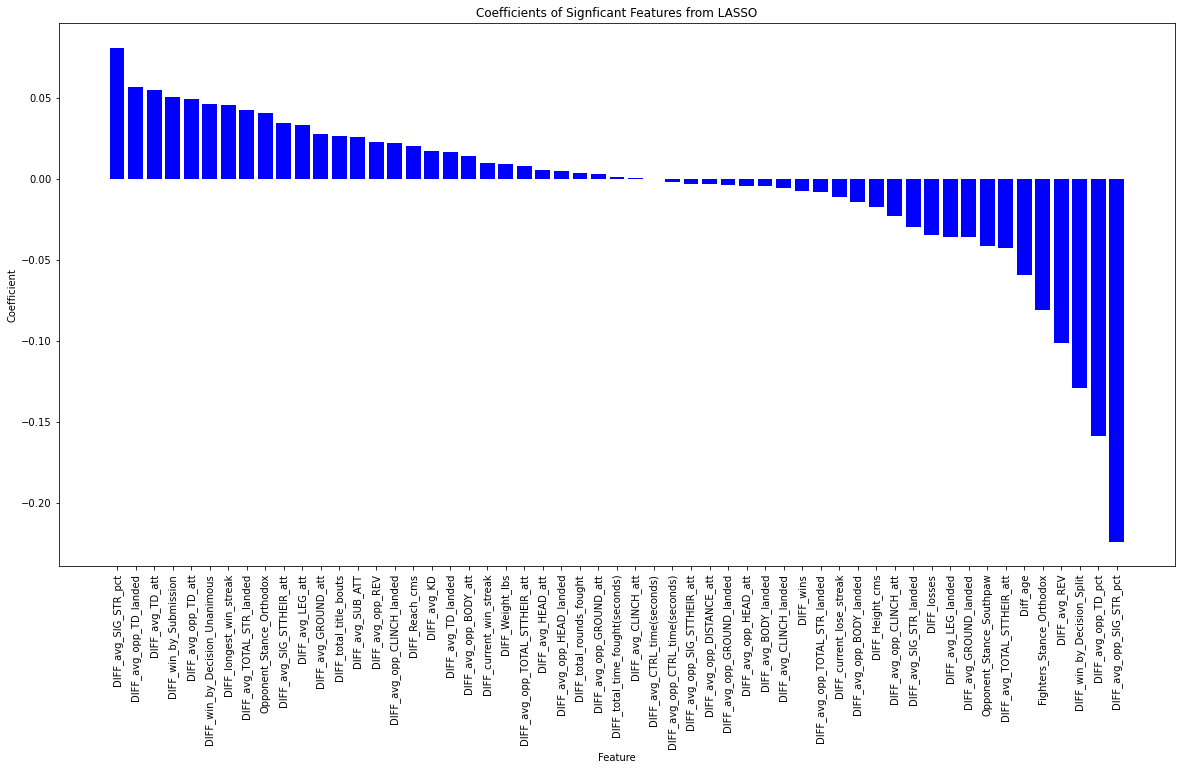

In [36]:
# plot coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar('features', 'coefficient', data = coef_df, color = "blue")
plt.xlabel("Feature")
plt.xticks(rotation = 90)
plt.ylabel("Coefficient")
plt.title("Coefficients of Signficant Features from LASSO")
plt.show()

In [37]:
# removing insifnificant features from X
X_train_imp = X_train[coef_df.features]
X_test_imp = X_test[coef_df.features]
X_train_imp.head(3)

,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_TD_landed,DIFF_avg_TD_att,DIFF_win_by_Submission,DIFF_avg_opp_TD_att,DIFF_win_by_Decision_Unanimous,DIFF_longest_win_streak,DIFF_avg_TOTAL_STR_landed,Opponent_Stance_Orthodox,DIFF_avg_SIG_STTHEIR_att,...,DIFF_avg_LEG_landed,DIFF_avg_GROUND_landed,Opponent_Stance_Southpaw,DIFF_avg_TOTAL_STTHEIR_att,Diff_age,Fighters_Stance_Orthodox,DIFF_avg_REV,DIFF_win_by_Decision_Split,DIFF_avg_opp_TD_pct,DIFF_avg_opp_SIG_STR_pct
7696,-0.146875,1.875000,0.234375,0,1.312500,3,3,1.718750,1,-52.640625,...,-4.328125,-2.62500,0,-0.015625,4,1,0.015625,0,0.357031,-0.102969
3463,-0.074688,1.789062,-1.648438,1,2.960938,3,3,17.359375,1,21.578125,...,-0.585938,2.40625,0,34.054688,-3,1,0.000000,0,0.214531,0.261719
6685,-0.210000,4.000000,4.000000,1,6.000000,0,-1,49.000000,0,-7.000000,...,2.000000,1.00000,0,66.500000,-10,1,1.000000,0,0.660000,0.120000


In [38]:
##X_train_imp.to_csv('LGRimpFeaturesOnlyUFC.csv')

In [39]:
# Rerunning Logistic Regression with reduced feature set
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(X_train_imp,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [40]:

print('Train R2:',logr.score(X_train_imp,y_train).round(2))
print('Test R2:',logr.score(X_test_imp,y_test).round(2))

Train R2: 0.61
Test R2: 0.59


## PCA Feature Selection

In [41]:
def biplot(X,n_comp,j1,j2,scale=1,alpha=0.25,s=50):
    
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    #X = (X-X.mean())/X.std()
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    cols = ['PC-'+str(i+1) for i in range(n_comp)]
    Z = pca.transform(X)
    Z = pd.DataFrame(Z,columns=cols)
    Z.plot.scatter(x=j1-1,y=j2-1,
                   alpha=alpha,
                   s=s,
                   figsize=(10,10))
    sd = np.sqrt(pca.explained_variance_)
    Zj1 = sd[j1-1]*np.array([1,0])
    Zj2 = sd[j2-1]*np.array([0,1])
    plt.arrow(0,0,Zj1[0],Zj1[1],head_width=0.1,color='k')
    plt.arrow(0,0,Zj2[0],Zj2[1],head_width=0.1,color='k')

    L = pca.components_
    L = pd.DataFrame(L,index=cols,columns=X.columns)
    for k in range(X.shape[1]):
        x = scale*L.iloc[j1-1,k]
        y = scale*L.iloc[j2-1,k]
        plt.arrow(0,0,x,y,head_width=0.1,color='r')
        plt.text(1.2*x,1.2*y,X.columns[k],color='black')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        
    PVE = pca.explained_variance_ratio_
    PVE = pd.Series(PVE,index=cols)
    return PVE

PC-1     0.678969
PC-2     0.148145
PC-3     0.118132
PC-4     0.024077
PC-5     0.017286
PC-6     0.002588
PC-7     0.002535
PC-8     0.001350
PC-9     0.001205
PC-10    0.000980
dtype: float64

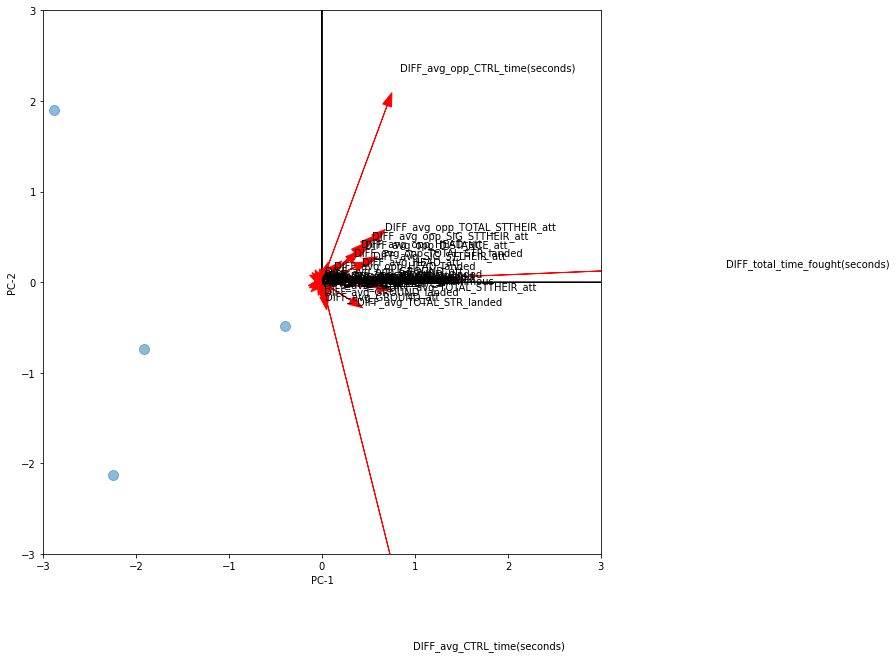

In [42]:
biplot(X_train_imp,10,1,2,scale=4,alpha=.5,s=100)

In [43]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
    
model = PCA(n_components=25).fit(X_train)
X_pc = model.transform(X_train)
print(X_pc)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
print(most_important)

initial_feature_names = X_train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df1 = pd.DataFrame(dic.items(), columns =['PC','Label'])
df1

[[ 1.57045362e+01 -2.18214524e+01  3.04626251e+02 ...  1.83993452e+00
   2.31102663e+00 -5.87070776e-01]
 [ 2.50506292e+02  4.11298767e+01  9.77362673e+01 ... -1.25109655e+00
   3.30659313e+00 -1.01407806e+00]
 [ 7.51707387e+02 -7.28705932e+01  3.14854573e+02 ... -2.31138847e+00
  -4.83914967e-01  1.02190838e+00]
 ...
 [ 4.21975199e+01  1.34548831e+01  1.92881349e+01 ...  3.25535247e-02
   2.93449930e+00 -1.17369969e+00]
 [ 3.92183343e+02  2.91053815e+02  3.13999970e+02 ...  2.85403914e+00
  -1.29806511e+00  5.84671436e-01]
 [-2.84378828e+02 -1.56353283e+01  1.12235245e+02 ... -2.17353893e+00
   4.04899707e+00  5.01056266e-01]]
[48, 46, 47, 48, 16, 15, 17, 35, 49, 49, 37, 25, 38, 42, 64, 64, 26, 38, 63, 28, 65, 62, 18, 51, 35]
['DIFF_total_time_fought(seconds)', 'DIFF_avg_CTRL_time(seconds)', 'DIFF_avg_opp_CTRL_time(seconds)', 'DIFF_total_time_fought(seconds)', 'DIFF_avg_opp_TOTAL_STTHEIR_att', 'DIFF_avg_TOTAL_STR_landed', 'DIFF_avg_opp_TOTAL_STR_landed', 'DIFF_avg_DISTANCE_landed', 'D

,PC,Label
0,PC0,DIFF_total_time_fought(seconds)
1,PC1,DIFF_avg_CTRL_time(seconds)
2,PC2,DIFF_avg_opp_CTRL_time(seconds)
3,PC3,DIFF_total_time_fought(seconds)
4,PC4,DIFF_avg_opp_TOTAL_STTHEIR_att
5,PC5,DIFF_avg_TOTAL_STR_landed
6,PC6,DIFF_avg_opp_TOTAL_STR_landed
7,PC7,DIFF_avg_DISTANCE_landed
8,PC8,DIFF_total_rounds_fought
9,PC9,DIFF_total_rounds_fought


In [44]:
PVE = model.explained_variance_ratio_
PVE = pd.Series(PVE)

PVEtop10 = PVE.sort_values(ascending=False)[:25]
df1['Value'] = PVEtop10
#.plot.barh()
df1

,PC,Label,Value
0,PC0,DIFF_total_time_fought(seconds),0.668703
1,PC1,DIFF_avg_CTRL_time(seconds),0.146540
2,PC2,DIFF_avg_opp_CTRL_time(seconds),0.124782
3,PC3,DIFF_total_time_fought(seconds),0.025035
4,PC4,DIFF_avg_opp_TOTAL_STTHEIR_att,0.018500
5,PC5,DIFF_avg_TOTAL_STR_landed,0.003070
6,PC6,DIFF_avg_opp_TOTAL_STR_landed,0.002574
7,PC7,DIFF_avg_DISTANCE_landed,0.001433
8,PC8,DIFF_total_rounds_fought,0.001376
9,PC9,DIFF_total_rounds_fought,0.001245


<BarContainer object of 25 artists>

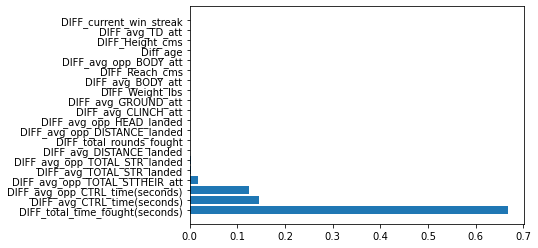

In [45]:
import matplotlib.pyplot as plt
Best10 = pd.Series(df1.Value,df1.Label)
plt.barh(df1.Label, df1.Value)


In [46]:
# removing insifnificant features from X

X_train_imp = X_train[df1.Label]
X_test_imp = X_test[df1.Label]

X_train_imp = X_train_imp.loc[:,~X_train_imp.columns.duplicated()]
X_test_imp = X_test_imp.loc[:,~X_test_imp.columns.duplicated()]

X_train_imp = (X_train_imp - X_train_imp.mean())/X_train_imp.std()
X_test_imp = (X_test_imp - X_test_imp.mean())/X_test_imp.std()


X_train_imp.head(3)

,DIFF_total_time_fought(seconds),DIFF_avg_CTRL_time(seconds),DIFF_avg_opp_CTRL_time(seconds),DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_TOTAL_STR_landed,DIFF_avg_opp_TOTAL_STR_landed,DIFF_avg_DISTANCE_landed,DIFF_total_rounds_fought,DIFF_avg_opp_DISTANCE_landed,DIFF_avg_opp_HEAD_landed,DIFF_avg_CLINCH_att,DIFF_avg_GROUND_att,DIFF_Weight_lbs,DIFF_avg_BODY_att,DIFF_Reach_cms,DIFF_avg_opp_BODY_att,Diff_age,DIFF_Height_cms,DIFF_avg_TD_att,DIFF_current_win_streak
7696,0.107577,0.190055,1.457717,-1.273682,0.044592,-0.525072,-1.261680,0.796934,-1.021173,-1.195680,-1.394798,-0.314967,-0.002946,-0.679973,1.529942,-0.285514,0.767073,1.603017,0.066723,0.437253
3463,0.617162,0.201961,0.912569,0.491939,0.416316,0.720349,0.183525,1.042057,0.246938,0.452698,-0.075933,0.282482,-0.002946,0.053153,0.307991,0.166182,-0.583988,0.800445,-0.423624,1.297658
6685,1.975922,1.373245,2.171843,1.012186,1.168306,1.590100,-0.570844,0.061566,0.021760,0.631135,-0.042300,0.497374,-1.435549,-0.351687,0.918966,0.153764,-1.935048,-0.403414,1.047416,-0.423152


In [47]:
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(X_train_imp,y_train)
print('Train R2:',logr.score(X_train_imp,y_train).round(3))
print('Test R2:',logr.score(X_test_imp,y_test).round(3))

Train R2: 0.599
Test R2: 0.566


In [48]:
print(logr.classes_)
logr.coef_

['Draw' 'Loss' 'Win']


array([[-0.02410549, -0.07318469, -0.00507851,  0.00082576,  0.09264739,
         0.07355109, -0.11694941,  0.07792668,  0.15606317, -0.1642371 ,
        -0.01308132, -0.01742162,  0.01238212, -0.02675056, -0.07055411,
        -0.03673684,  0.00247115,  0.00151635, -0.02214099,  0.00149534],
       [-0.12747634,  0.07746599,  0.07213662,  0.04252926,  0.06222092,
        -0.02987596, -0.12028247, -0.07122039, -0.01388018,  0.15423453,
        -0.02018014, -0.08976512, -0.04972172,  0.05233644, -0.05153611,
         0.01783986,  0.15991934,  0.05561045, -0.07615803, -0.06492455],
       [ 0.15158184, -0.00428129, -0.06705811, -0.04335502, -0.1548683 ,
        -0.04367513,  0.23723187, -0.00670629, -0.14218299,  0.01000257,
         0.03326146,  0.10718674,  0.0373396 , -0.02558589,  0.12209022,
         0.01889698, -0.16239049, -0.05712681,  0.09829902,  0.06342921]])

In [49]:
coef_df = pd.DataFrame()
coef_df['Features'] = X_train_imp.columns
coef_df['Coefficients'] = logr.coef_[2]
coef_df = coef_df.sort_values(by=['Coefficients'], ascending = False)
coef_df.head(21)

,Features,Coefficients
6,DIFF_avg_DISTANCE_landed,0.237232
0,DIFF_total_time_fought(seconds),0.151582
14,DIFF_Reach_cms,0.122090
11,DIFF_avg_GROUND_att,0.107187
18,DIFF_avg_TD_att,0.098299
19,DIFF_current_win_streak,0.063429
12,DIFF_Weight_lbs,0.037340
10,DIFF_avg_CLINCH_att,0.033261
15,DIFF_avg_opp_BODY_att,0.018897
9,DIFF_avg_opp_HEAD_landed,0.010003


## Feature Engineering

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
Xe_train = poly.fit_transform(X_train_imp)
Xe_test = poly.fit_transform(X_test_imp)

cols = poly.get_feature_names(X_train_imp.columns)

Xe_train = pd.DataFrame(Xe_train,columns=cols)
Xe_test = pd.DataFrame(Xe_test,columns=cols)

print('             X shape =',X_train_imp.shape)
print('X (engineered) shape =',Xe_train.shape)
Xe_train.head(3)

             X shape = (6224, 20)
X (engineered) shape = (6224, 230)


,DIFF_total_time_fought(seconds),DIFF_avg_CTRL_time(seconds),DIFF_avg_opp_CTRL_time(seconds),DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_TOTAL_STR_landed,DIFF_avg_opp_TOTAL_STR_landed,DIFF_avg_DISTANCE_landed,DIFF_total_rounds_fought,DIFF_avg_opp_DISTANCE_landed,DIFF_avg_opp_HEAD_landed,...,Diff_age^2,Diff_age DIFF_Height_cms,Diff_age DIFF_avg_TD_att,Diff_age DIFF_current_win_streak,DIFF_Height_cms^2,DIFF_Height_cms DIFF_avg_TD_att,DIFF_Height_cms DIFF_current_win_streak,DIFF_avg_TD_att^2,DIFF_avg_TD_att DIFF_current_win_streak,DIFF_current_win_streak^2
0,0.107577,0.190055,1.457717,-1.273682,0.044592,-0.525072,-1.261680,0.796934,-1.021173,-1.195680,...,0.588401,1.229631,0.051181,0.335405,2.569664,0.106958,0.700924,0.004452,0.029175,0.191190
1,0.617162,0.201961,0.912569,0.491939,0.416316,0.720349,0.183525,1.042057,0.246938,0.452698,...,0.341042,-0.467450,0.247391,-0.757816,0.640712,-0.339088,1.038704,0.179457,-0.549719,1.683917
2,1.975922,1.373245,2.171843,1.012186,1.168306,1.590100,-0.570844,0.061566,0.021760,0.631135,...,3.744412,0.780625,-2.026801,0.818820,0.162743,-0.422542,0.170706,1.097081,-0.443217,0.179058


In [52]:
Xe_train = (Xe_train - Xe_train.mean())/Xe_train.std()
Xe_test = (Xe_test - Xe_test.mean())/Xe_test.std()

In [53]:
# add bias column of ones
Xe_train['bias'] = 1
Xe_test['bias'] = 1

Xe_train.head(3)

,DIFF_total_time_fought(seconds),DIFF_avg_CTRL_time(seconds),DIFF_avg_opp_CTRL_time(seconds),DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_TOTAL_STR_landed,DIFF_avg_opp_TOTAL_STR_landed,DIFF_avg_DISTANCE_landed,DIFF_total_rounds_fought,DIFF_avg_opp_DISTANCE_landed,DIFF_avg_opp_HEAD_landed,...,Diff_age DIFF_Height_cms,Diff_age DIFF_avg_TD_att,Diff_age DIFF_current_win_streak,DIFF_Height_cms^2,DIFF_Height_cms DIFF_avg_TD_att,DIFF_Height_cms DIFF_current_win_streak,DIFF_avg_TD_att^2,DIFF_avg_TD_att DIFF_current_win_streak,DIFF_current_win_streak^2,bias
0,0.107577,0.190055,1.457717,-1.273682,0.044592,-0.525072,-1.261680,0.796934,-1.021173,-1.195680,...,1.383059,0.037063,0.272271,0.955184,0.220746,0.697278,-0.520426,-0.024664,-0.309006,1
1,0.617162,0.201961,0.912569,0.491939,0.416316,0.720349,0.183525,1.042057,0.246938,0.452698,...,-0.279007,0.232118,-0.747929,-0.218517,-0.224319,1.062063,-0.428927,-0.598836,0.261404,1
2,1.975922,1.373245,2.171843,1.012186,1.168306,1.590100,-0.570844,0.061566,0.021760,0.631135,...,0.943317,-2.028684,0.723397,-0.509344,-0.307590,0.124668,0.050842,-0.493202,-0.313642,1


In [54]:
# cross-validation
logr = LogisticRegression(fit_intercept=False, max_iter = 10000)
logr.fit(Xe_train, y_train)
poly_train_score = logr.score(Xe_train, y_train)
poly_test_score = logr.score(Xe_test, y_test)
print('Train Score: ', poly_train_score.round(3))
print('Test Score: ', poly_test_score.round(3))

Train Score:  0.604
Test Score:  0.535


### PCA on Poly Features

In [55]:
model = PCA(n_components=25).fit(Xe_train)
Xe_pc = model.transform(Xe_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = Xe_train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df1e = pd.DataFrame(dic.items(), columns =['PC','Label'])
df1e

,PC,Label
0,PC0,DIFF_total_time_fought(seconds) DIFF_avg_opp_D...
1,PC1,DIFF_avg_CTRL_time(seconds) DIFF_avg_opp_TOTAL...
2,PC2,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Height_cms
3,PC3,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_total_roun...
4,PC4,DIFF_avg_opp_CTRL_time(seconds) DIFF_avg_opp_T...
5,PC5,DIFF_avg_CTRL_time(seconds) DIFF_avg_GROUND_att
6,PC6,DIFF_avg_CLINCH_att DIFF_avg_BODY_att
7,PC7,DIFF_avg_opp_TOTAL_STTHEIR_att
8,PC8,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Weight_lbs
9,PC9,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_current_wi...


In [56]:
PVE = model.explained_variance_ratio_
PVE = pd.Series(PVE)

PVEtop10 = PVE.sort_values(ascending=False)[:25]
df1e['Value'] = PVEtop10
#.plot.barh()
df1e

,PC,Label,Value
0,PC0,DIFF_total_time_fought(seconds) DIFF_avg_opp_D...,0.111850
1,PC1,DIFF_avg_CTRL_time(seconds) DIFF_avg_opp_TOTAL...,0.058131
2,PC2,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Height_cms,0.049949
3,PC3,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_total_roun...,0.038493
4,PC4,DIFF_avg_opp_CTRL_time(seconds) DIFF_avg_opp_T...,0.030562
5,PC5,DIFF_avg_CTRL_time(seconds) DIFF_avg_GROUND_att,0.029586
6,PC6,DIFF_avg_CLINCH_att DIFF_avg_BODY_att,0.029153
7,PC7,DIFF_avg_opp_TOTAL_STTHEIR_att,0.026476
8,PC8,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Weight_lbs,0.025211
9,PC9,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_current_wi...,0.024816


<BarContainer object of 25 artists>

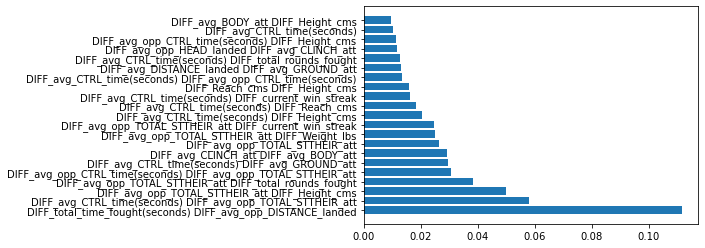

In [57]:
Best10 = pd.Series(df1e.Value,df1e.Label)
plt.barh(df1e.Label, df1e.Value)

In [58]:
# removing insifnificant features from X

Xe_train = Xe_train[df1e.Label]
Xe_test = Xe_test[df1e.Label]

Xe_train = Xe_train.loc[:,~Xe_train.columns.duplicated()]
Xe_test = Xe_test.loc[:,~Xe_test.columns.duplicated()]

Xe_train = (Xe_train - Xe_train.mean())/Xe_train.std()
Xe_test = (Xe_test - Xe_test.mean())/Xe_test.std()


Xe_train.head(3)

,DIFF_total_time_fought(seconds) DIFF_avg_opp_DISTANCE_landed,DIFF_avg_CTRL_time(seconds) DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Height_cms,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_total_rounds_fought,DIFF_avg_opp_CTRL_time(seconds) DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_CTRL_time(seconds) DIFF_avg_GROUND_att,DIFF_avg_CLINCH_att DIFF_avg_BODY_att,DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Weight_lbs,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_current_win_streak,...,DIFF_avg_CTRL_time(seconds) DIFF_Reach_cms,DIFF_avg_CTRL_time(seconds) DIFF_current_win_streak,DIFF_Reach_cms DIFF_Height_cms,DIFF_avg_CTRL_time(seconds) DIFF_avg_opp_CTRL_time(seconds),DIFF_avg_DISTANCE_landed DIFF_avg_GROUND_att,DIFF_avg_CTRL_time(seconds) DIFF_total_rounds_fought,DIFF_avg_opp_HEAD_landed DIFF_avg_CLINCH_att,DIFF_avg_opp_CTRL_time(seconds) DIFF_Height_cms,DIFF_avg_CTRL_time(seconds),DIFF_avg_BODY_att DIFF_Height_cms
0,-0.568726,-0.291603,-1.933025,-1.160341,-1.869887,-0.395328,0.303169,-1.273682,0.056688,-0.540823,...,0.307910,0.030000,1.379183,0.352855,0.530332,0.097726,1.342378,2.170739,0.190055,-1.127150
1,-0.336532,0.063259,0.477495,0.271791,0.161810,-0.324362,-0.335422,0.491939,0.051250,0.568852,...,0.074361,0.180954,-0.303630,0.250171,0.182147,0.161084,-0.244454,0.638611,0.201961,0.007934
2,-0.433397,1.404692,-0.316376,-0.150359,1.703369,0.055608,-0.322742,1.012186,-1.465955,-0.421423,...,1.300258,-0.530206,-0.774494,3.348303,-0.156184,0.025860,-0.237296,-0.893829,1.373245,0.107486


In [59]:
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(Xe_train,y_train)
print('Train R2:',logr.score(Xe_train,y_train).round(3))
print('Test R2:',logr.score(Xe_test,y_test).round(3))

Train R2: 0.52
Test R2: 0.506


In [60]:
coef_df = pd.DataFrame()
coef_df['Features'] = Xe_train.columns
coef_df['Coefficients'] = logr.coef_[2]
coef_df = coef_df.sort_values(by=['Coefficients'], ascending = False)
coef_df.head(21)

,Features,Coefficients
5,DIFF_avg_CTRL_time(seconds) DIFF_avg_GROUND_att,0.136186
19,DIFF_avg_CTRL_time(seconds),0.101322
8,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Weight_lbs,0.053570
18,DIFF_avg_opp_CTRL_time(seconds) DIFF_Height_cms,0.050054
9,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_current_wi...,0.044384
1,DIFF_avg_CTRL_time(seconds) DIFF_avg_opp_TOTAL...,0.016093
4,DIFF_avg_opp_CTRL_time(seconds) DIFF_avg_opp_T...,0.013273
10,DIFF_avg_CTRL_time(seconds) DIFF_Height_cms,0.012261
20,DIFF_avg_BODY_att DIFF_Height_cms,0.001409
6,DIFF_avg_CLINCH_att DIFF_avg_BODY_att,-0.000579


## Confusion Matrix

In [61]:
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(X_train_imp,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [70]:
predictions = logr.predict(X_test_imp)
predictions

array(['Win', 'Loss', 'Loss', ..., 'Win', 'Loss', 'Loss'], dtype=object)

In [77]:
y_test.iloc[0]

'Loss'

In [79]:
true_wins = 0
true_losses = 0
true_draws = 0
false_wins = 0
false_losses = 0
false_draws = 0

for i in range(len(predictions)):
    if (predictions[i] == 'Win'):
        if (predictions[i] == y_test.iloc[i]):
            true_wins += 1
        else:
            false_wins += 1
    if (predictions[i] == 'Loss'):
        if (predictions[i] == y_test.iloc[i]):
            true_losses += 1
        else:
            false_losses += 1
    if (predictions[i] == 'Draw'):
        if (predictions[i] == y_test.iloc[i]):
            true_draws += 1
        else:
            false_draws += 1
        
print('True Wins:', true_wins)
print('True Losses:', true_losses)
print('True Draw:', true_draws)
print('')
print('False Wins:', false_wins)
print('False Losses:', false_losses)
print('False Draws:', false_draws)

True Wins: 436
True Losses: 445
True Draw: 0

False Wins: 318
False Losses: 357
False Draws: 0
